In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings("ignore")

Data Preprocessing

In [83]:
train=pd.read_csv("Training.csv")
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [84]:
train.drop('Unnamed: 133', axis=1, inplace=True)
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [85]:
df=train
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [86]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Data Visualisation

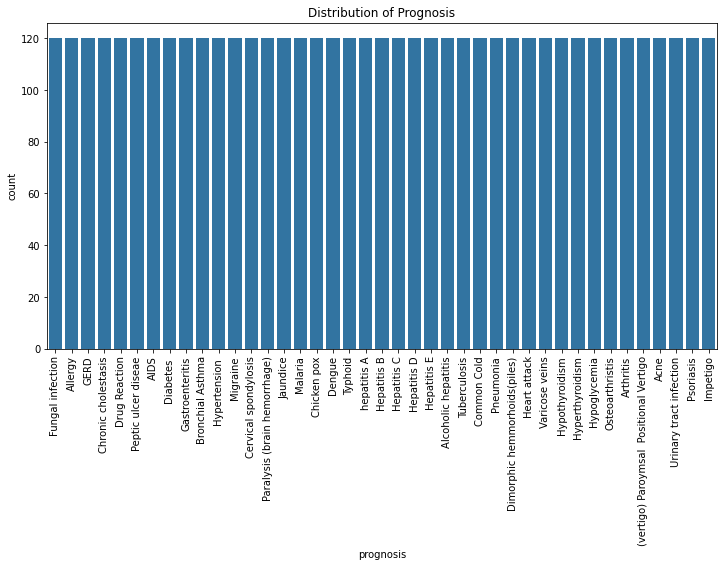

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='prognosis', data=df)
plt.title('Distribution of Prognosis')
plt.xticks(rotation=90)
plt.show()

In [88]:
correlation_matrix = df.corr()
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


<Axes: >

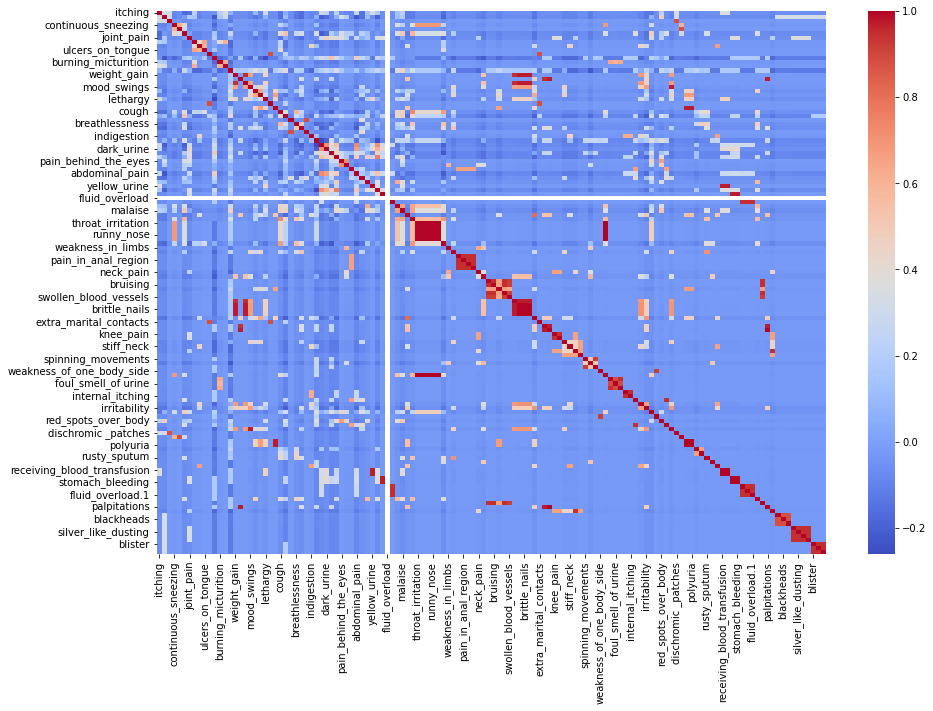

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap='coolwarm')

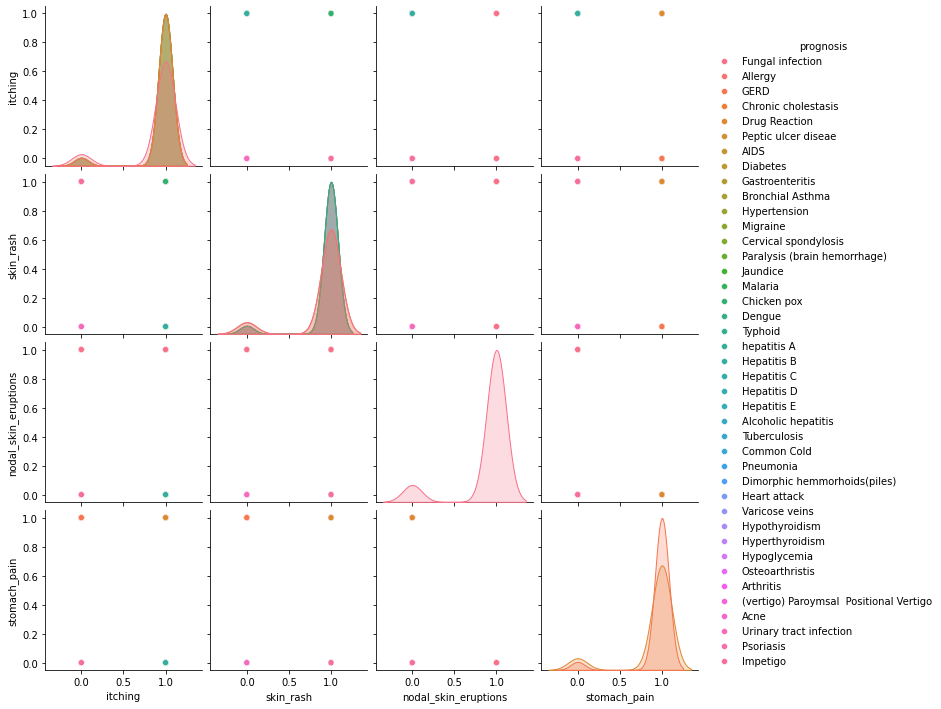

In [90]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

sns.pairplot(df[selected_columns], hue='prognosis')

plt.show()


Data Modelling

In [91]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

Model Training

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [93]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)
class_report=classification_report(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))
print("Classification Report",class_report)

Decision Tree Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Co

Random Forest Classifier

In [94]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)
class_report=classification_report(y_test, tree_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))
print("Classification Report",class_report)

Random Forest Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Co

Logistic Regression Classifier

In [95]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
class_report=classification_report(y_test, tree_pred)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))
print("Classification Report",class_report)

Logistic Regression Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                        

Model Testing and performance evaluation

In [96]:
df_test=pd.read_csv("Testing.csv")
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

In [97]:
def test_accuracy(model,X):
    
    #predict
    pred = model.predict(X)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y,pred))
    
    #classification report
    print("\n",classification_report(y,pred))

Decision Tree Classifier Test Report

In [98]:

test_accuracy(tree,X)

accuracy score =  0.9761904761904762

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

Random Forest Classifier Report on Testing

In [99]:
test_accuracy(forest,X)

accuracy score =  0.9761904761904762

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

Logistic Regression Classifier Report

In [100]:
test_accuracy(logreg,X)

accuracy score =  1.0

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
   

Association Analysis (Apriori)

5% of the transaction

In [101]:

association_data = df[['prognosis'] + list(df.columns[:-1])]
association_data = pd.get_dummies(association_data)
frequent_itemsets = apriori(association_data, min_support=0.05, use_colnames=True)
print(frequent_itemsets.head(50))

     support                        itemsets
0   0.137805                       (itching)
1   0.159756                     (skin_rash)
2   0.162195                        (chills)
3   0.139024                    (joint_pain)
4   0.389024                      (vomiting)
5   0.392683                       (fatigue)
6   0.092683                   (weight_loss)
7   0.092683                      (lethargy)
8   0.114634                         (cough)
9   0.276829                    (high_fever)
10  0.091463                (breathlessness)
11  0.137805                      (sweating)
12  0.230488                      (headache)
13  0.185366                (yellowish_skin)
14  0.115854                    (dark_urine)
15  0.232927                        (nausea)
16  0.234146              (loss_of_appetite)
17  0.209756                (abdominal_pain)
18  0.114634                     (diarrhoea)
19  0.071951                    (mild_fever)
20  0.165854             (yellowing_of_eyes)
21  0.0707

10% of the transaction

In [102]:
association_data = df[['prognosis'] + list(df.columns[:-1])]
association_data = pd.get_dummies(association_data)
frequent_itemsets = apriori(association_data, min_support=0.1, use_colnames=True)
print(frequent_itemsets.head(50))

     support                             itemsets
0   0.137805                            (itching)
1   0.159756                          (skin_rash)
2   0.162195                             (chills)
3   0.139024                         (joint_pain)
4   0.389024                           (vomiting)
5   0.392683                            (fatigue)
6   0.114634                              (cough)
7   0.276829                         (high_fever)
8   0.137805                           (sweating)
9   0.230488                           (headache)
10  0.185366                     (yellowish_skin)
11  0.115854                         (dark_urine)
12  0.232927                             (nausea)
13  0.234146                   (loss_of_appetite)
14  0.209756                     (abdominal_pain)
15  0.114634                          (diarrhoea)
16  0.165854                  (yellowing_of_eyes)
17  0.142683                            (malaise)
18  0.141463                         (chest_pain)


15% of the transaction

In [103]:
association_data = df[['prognosis'] + list(df.columns[:-1])]
association_data = pd.get_dummies(association_data)
frequent_itemsets = apriori(association_data, min_support=0.15, use_colnames=True)
print(frequent_itemsets.head(50))

     support                               itemsets
0   0.159756                            (skin_rash)
1   0.162195                               (chills)
2   0.389024                             (vomiting)
3   0.392683                              (fatigue)
4   0.276829                           (high_fever)
5   0.230488                             (headache)
6   0.185366                       (yellowish_skin)
7   0.232927                               (nausea)
8   0.234146                     (loss_of_appetite)
9   0.209756                       (abdominal_pain)
10  0.165854                    (yellowing_of_eyes)
11  0.154878                    (vomiting, fatigue)
12  0.198780                     (vomiting, nausea)
13  0.156098           (vomiting, loss_of_appetite)
14  0.176829             (vomiting, abdominal_pain)
15  0.198780                  (fatigue, high_fever)
16  0.157317            (fatigue, loss_of_appetite)
17  0.154878       (yellowish_skin, abdominal_pain)
18  0.159756

20% of the transaction

In [104]:
association_data = df[['prognosis'] + list(df.columns[:-1])]
association_data = pd.get_dummies(association_data)
frequent_itemsets = apriori(association_data, min_support=0.2, use_colnames=True)
print(frequent_itemsets.head(50))

    support            itemsets
0  0.389024          (vomiting)
1  0.392683           (fatigue)
2  0.276829        (high_fever)
3  0.230488          (headache)
4  0.232927            (nausea)
5  0.234146  (loss_of_appetite)
6  0.209756    (abdominal_pain)


In [105]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [107]:
import pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [124]:
z=[0	,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0	,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]
# Reshape the input data to match the number of features
z_reshaped = np.array(z).reshape(1, -1)  # Reshape z to have the same number of features as the training data

import numpy as np

# Given class prediction
logreg_pred = logreg.predict(z_reshaped)

# Assuming you have three classes corresponding to X-ray, Blood Tests, and CT Scan
class_labels = ['X-ray', 'Blood Tests', 'CT Scan']

# Define a dictionary mapping each medical condition to the recommended diagnostic test
diagnostic_tests = {
    'Fungal infection': 'X-ray',
    'Tuberculosis': 'X-ray',
    'Pneumonia': 'X-ray',
    'Dimorphic Hemorrhoids (Piles)': 'X-ray',
    'Heart Attack': 'X-ray',
    'Varicose Veins': 'X-ray',
    'Osteoarthritis': 'X-ray',
    'Arthritis': 'X-ray',
    '(Vertigo) Paroxysmal Positional Vertigo': 'X-ray',
    'Acne': 'X-ray',
    'Urinary Tract Infection': 'X-ray',
    'Psoriasis': 'X-ray',
    'Impetigo': 'X-ray',
    'Allergy': 'Blood Tests',
    'GERD': 'Blood Tests',
    'Chronic Cholestasis': 'Blood Tests',
    'Drug Reaction': 'Blood Tests',
    'AIDS': 'Blood Tests',
    'Diabetes': 'Blood Tests',
    'Gastroenteritis': 'Blood Tests',
    'Hypertension': 'Blood Tests',
    'Migraine': 'Blood Tests',
    'Cervical Spondylosis': 'Blood Tests',
    'Paralysis (Brain Hemorrhage)': 'Blood Tests',
    'Jaundice': 'Blood Tests',
    'Malaria': 'Blood Tests',
    'Chicken Pox': 'Blood Tests',
    'Dengue': 'Blood Tests',
    'Typhoid': 'Blood Tests',
    'Hepatitis A': 'Blood Tests',
    'Hepatitis B': 'Blood Tests',
    'Hepatitis C': 'Blood Tests',
    'Hepatitis D': 'Blood Tests',
    'Hepatitis E': 'Blood Tests',
    'Alcoholic Hepatitis': 'Blood Tests',
    'Common Cold': 'Blood Tests',
    'Hypothyroidism': 'Blood Tests',
    'Hyperthyroidism': 'Blood Tests',
    'Hypoglycemia': 'Blood Tests',
    'Arthritis': 'Blood Tests',
    '(Vertigo) Paroxysmal Positional Vertigo': 'Blood Tests',
    'Acne': 'Blood Tests',
    'Urinary Tract Infection': 'Blood Tests',
    'Psoriasis': 'Blood Tests',
    'Impetigo': 'Blood Tests',
    'GERD': 'CT Scan',
    'Chronic Cholestasis': 'CT Scan',
    'Drug Reaction': 'CT Scan',
    'Paralysis (Brain Hemorrhage)': 'CT Scan',
    'Malaria': 'CT Scan',
    'Dengue': 'CT Scan',
    'Typhoid': 'CT Scan',
    'Hepatitis A': 'CT Scan',
    'Hepatitis B': 'CT Scan',
    'Hepatitis C': 'CT Scan',
    'Hepatitis D': 'CT Scan',
    'Hepatitis E': 'CT Scan',
    'Tuberculosis': 'CT Scan',
    'Pneumonia': 'CT Scan',
    'Heart attack': 'CT Scan',
    'Varicose Veins': 'CT Scan',
    'Osteoarthritis': 'CT Scan',
    'Arthritis': 'CT Scan',
    '(Vertigo) Paroxysmal Positional Vertigo': 'CT Scan',
    'Psoriasis': 'CT Scan',
    'Impetigo': 'CT Scan',
}
print(logreg_pred)
for predicted_class in logreg_pred:
    recommended_test = diagnostic_tests.get(predicted_class, "Unknown")
    print(f"The model predicts {predicted_class}.")
    print(f"Recommend {recommended_test} based on the model prediction.")


['Heart attack']
The model predicts Heart attack.
Recommend CT Scan based on the model prediction.
